In [ ]:
!pip install opencv-python ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
!pip install ultralytics opencv-python matplotlib


In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # Use this instead of cv2.imshow()

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Open video file
video_path = "2165-155327596_tiny.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection
    results = model(frame)

    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            class_id = int(box.cls[0].item())

            # Draw rectangle
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{model.names[class_id]} {conf:.2f}", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show frame in Google Colab
    cv2_imshow(frame)  # Replace cv2.imshow() with cv2_imshow()

cap.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

Processing frame 10...

0: 384x640 10 cars, 20.6ms
Speed: 3.9ms preprocess, 20.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


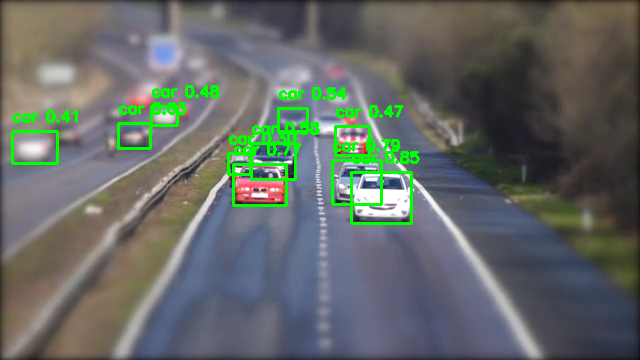

Processing frame 20...

0: 384x640 11 cars, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


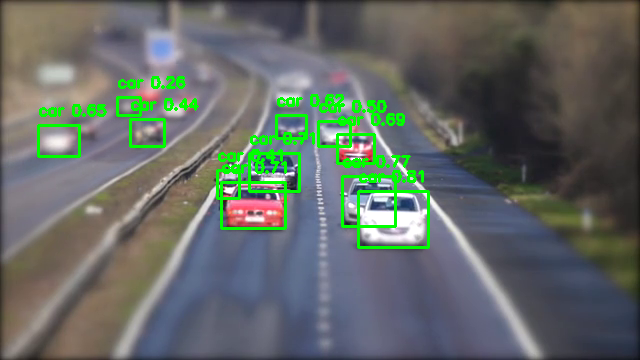

Processing frame 50...

0: 384x640 9 cars, 1 truck, 10.1ms
Speed: 3.0ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


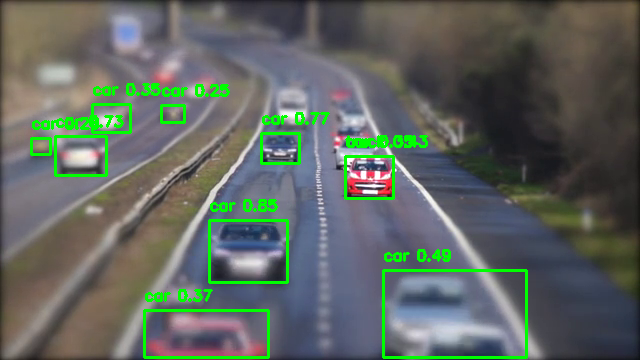

Processing frame 100...

0: 384x640 8 cars, 1 bus, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


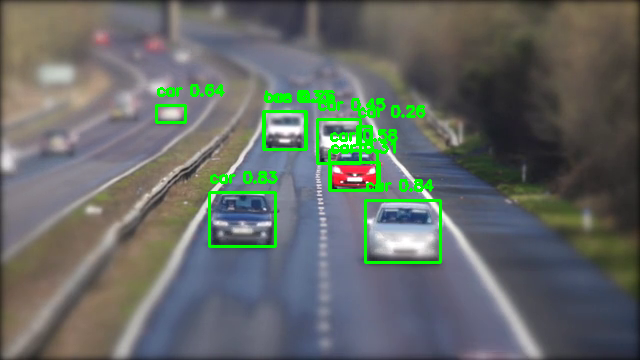

Processing frame 200...

0: 384x640 14 cars, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


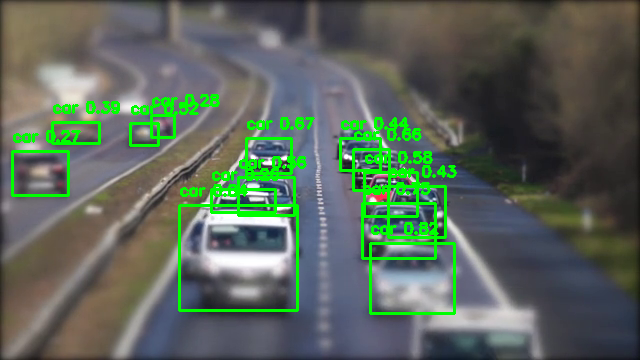

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Open video file
video_path = "2165-155327596_tiny.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Define the frames you want to process (adjust this list)
selected_frames = [10, 20, 50, 100, 200]  # Modify this to adjust which frames to detect on

frame_count = 0  # Track frame number

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Process only if frame_count is in selected_frames list
    if frame_count in selected_frames:
        print(f"Processing frame {frame_count}...")

        # Perform object detection
        results = model(frame)

        # Draw bounding boxes
        for result in results:
            for box in result.boxes:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                conf = box.conf[0].item()
                class_id = int(box.cls[0].item())

                # Draw rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, f"{model.names[class_id]} {conf:.2f}", (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Show selected frame in Google Colab
        cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import os
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
from ultralytics import YOLO

# Define paths
video_path = '2165-155327596_tiny.mp4'  # Change this to your actual video path
frames_dir = 'frames'
os.makedirs(frames_dir, exist_ok=True)

# Extract frames
cap = cv2.VideoCapture(video_path)
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_count += 1
    frame_path = os.path.join(frames_dir, f'{frame_count}.jpg')
    cv2.imwrite(frame_path, frame)
cap.release()


model = YOLO("yolov8n.pt")  # Load the YOLO model

def detect_objects(frame):
    results = model(frame)  # Run YOLO model on the frame
    detections = []

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Extract bounding box coordinates
            class_id = int(box.cls[0])  # Extract the class ID
            class_name = model.names[class_id]  # Get the class name from the model
            detections.append((x1, y1, x2 - x1, y2 - y1, class_name))  # Include class name in detections

    return detections

def process_frame(frame_number):
    frame_path = os.path.join(frames_dir, f'{frame_number}.jpg')
    frame = cv2.imread(frame_path)
    if frame is None:
        print(f"Frame {frame_number} not found!")
        return

    objects = detect_objects(frame)
    for idx, bbox in enumerate(objects):
        x, y, w, h, class_name = bbox  # Unpack bounding box and class name
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw the bounding box

        # Add label text on top of the bounding box
        label = f"{class_name} {idx+1}"  # Add object name and index
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with bounding boxes
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Create interactive widget
frame_slider = widgets.IntSlider(min=1, max=frame_count, step=1, description='Frame')
widgets.interactive(process_frame, frame_number=frame_slider)


interactive(children=(IntSlider(value=1, description='Frame', max=1501, min=1), Output()), _dom_classes=('widg…